## Email Spam Detection With Machine Learning

Weve all been the recipient of spam emails before. Spam mail, or junk mail, 
is a type of email that is sent to a massive number of users at one time, 
frequently containing cryptic messages, scams, or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. 
Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam.
Let's get started!

### Step1: Load and Preprocess Data

In [1]:
#Detect File Encoding and Load Data

import pandas as pd
import chardet
import warnings
warnings.filterwarnings('ignore')

#Detect the encoding of the file
with open('spam.csv','rb') as f:
    result = chardet.detect(f.read())

In [2]:
#Read the file using the detected encoding 
df=pd.read_csv('spam.csv',encoding=result['encoding'])
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#print First 5 rows only
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#print the all the columns name
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [5]:
#print the datatypes of each column
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [6]:
df.shape

(5572, 5)

In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
#Select Relevant Columns and Rename Them
df = df.iloc[:, :2]  


In [9]:
# Rename columns for convenience
df.columns = ['label', 'text']
# Encode the labels: spam = 1, ham = 0
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

In [10]:
# Display the first few rows to verify changes
print(df.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [11]:
#Text Cleaning
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
# Function to clean text
def clean_text(text):
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Remove digits
    text = re.sub(r'\d', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Split into words
    text = text.split()
    # Lemmatize and remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    # Join words back into a single string
    text = ' '.join(text)  
    return text
# Apply the cleaning function to the text data
df['text'] = df['text'].apply(clean_text)

In [14]:
# Display cleaned data
print(df.head())

   label                                               text
0      0  go jurong point crazy available bugis n great ...
1      0                            ok lar joking wif u oni
2      1  free entry wkly comp win fa cup final tkts st ...
3      0                u dun say early hor u c already say
4      0                nah think go usf life around though


### Step 2 : Visualize Class Distribution 

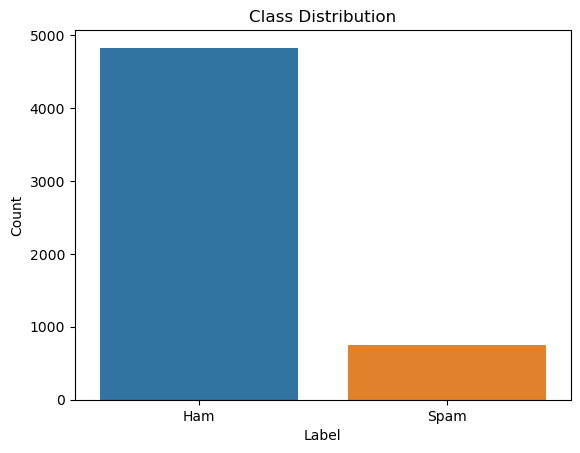

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()


### Step 3 : Feature Extraction and Model Training

In [16]:
# 1. TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Transform the text data into TF-IDF features
x = vectorizer.fit_transform(df['text'])
y = df['label']


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
model = MultinomialNB()
model.fit(x_train, y_train)


MultinomialNB()

### Step 4 : Evaluate the Model

In [19]:
# Make predictions
y_pred = model.predict(x_test)


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.979372197309417


In [22]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

Precision: 0.9635036496350365


In [23]:
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

Recall: 0.88


In [24]:
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')


F1-score: 0.9198606271777003


### Step 5 : Visualize Feature Importance and confusion Matrix

In [25]:
# Get the top features
feature_names = vectorizer.get_feature_names_out()
spam_log_prob = model.feature_log_prob_[1]
top_features = pd.DataFrame({'feature': feature_names, 'importance': spam_log_prob})
top_features = top_features.sort_values(by='importance', ascending=False).head(20)



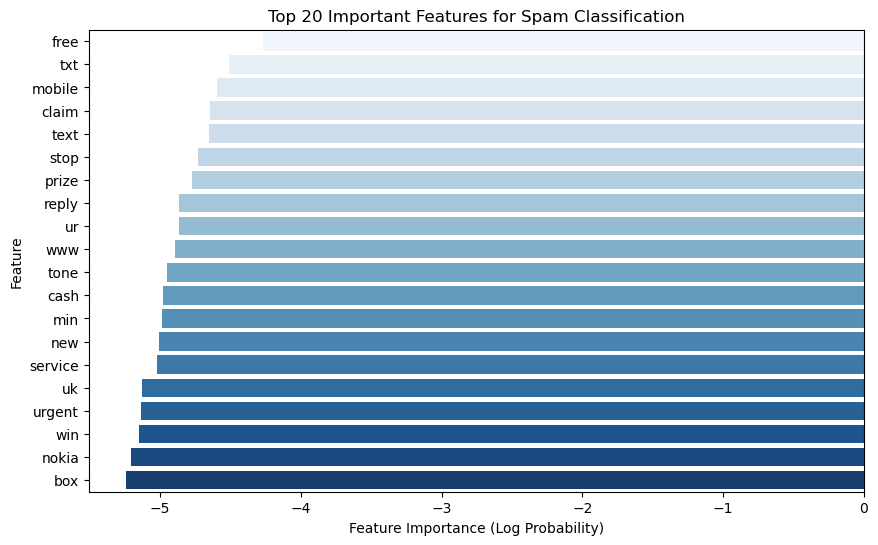

In [26]:
# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features, palette='Blues')
plt.title('Top 20 Important Features for Spam Classification')
plt.xlabel('Feature Importance (Log Probability)')
plt.ylabel('Feature')
plt.show()


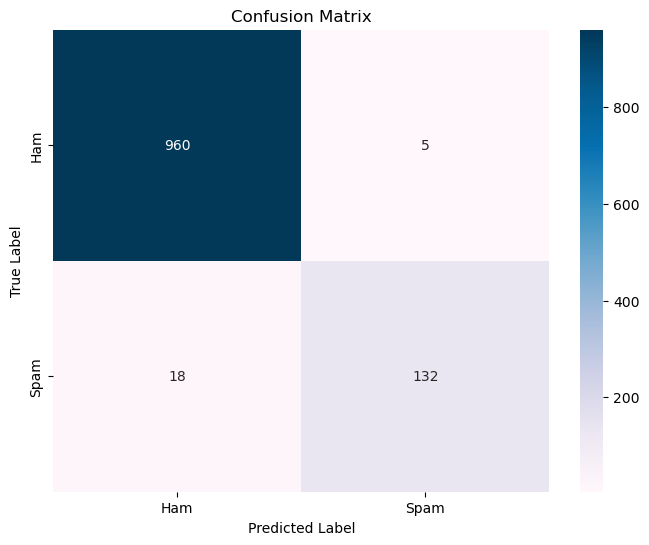

In [27]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
